# Getting started with PyCaret 1.0.0 


#### Boh Young Suh, April 2020

PyCaret is an open source, low-code machine learning library in Python that allows you to go from preparing your data to deploying your model within seconds.

Learn more from: https://pycaret.org/

## Machine Learning Pipeline in 10 Steps

### 1. Load Data

Use PyCaret's data respository to load the data using the get_data() function

In [1]:
# pip install pycaret

In [3]:
from pycaret.datasets import get_data
dataset = get_data('credit')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [4]:
dataset.shape

(24000, 24)

In [5]:
# Leave out 5% of dataset for final model test
data = dataset.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (22800, 24)
Unseen Data For Predictions: (1200, 24)


### 2. Set up environment in PyCaret

Initial step for data exploration, preprocessing 

In [22]:
from pycaret.classification import *
exp1 = setup(data, target = 'default', session_id=2345, normalize=True, remove_multicollinearity=True)
 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,2345
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(22800, 24)"
4,Missing Values,False
5,Numeric Features,14
6,Categorical Features,9
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


### 3. Compare ALL Model

Compare all models to evaluate performance. 

In [23]:
compare_models(fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Linear Discriminant Analysis,0.820600,0.762700,0.366900,0.673800,0.474800,0.377900
1,Ridge Classifier,0.820100,0.000000,0.348700,0.683100,0.461500,0.366900
2,Logistic Regression,0.819800,0.765300,0.350400,0.679700,0.462200,0.367000
3,Gradient Boosting Classifier,0.819800,0.776900,0.351800,0.678700,0.463300,0.367900
4,Extreme Gradient Boosting,0.819400,0.777100,0.345600,0.680700,0.458400,0.363600
5,SVM - Linear Kernel,0.817500,0.000000,0.316400,0.691900,0.434100,0.342800
6,CatBoost Classifier,0.817500,0.772500,0.364600,0.658500,0.469100,0.369700
7,Light Gradient Boosting Machine,0.815800,0.774200,0.355800,0.653900,0.460700,0.361100
8,Ada Boost Classifier,0.815600,0.766500,0.336500,0.664800,0.446300,0.349800
9,Random Forest Classifier,0.802200,0.721400,0.317300,0.600200,0.415000,0.309300


### 4. Create Model

Return a trained model 

In [8]:
# Logistic Regression
lr = create_model('lr', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8208,0.7598,0.3499,0.6861,0.4634,0.3692
1,0.8174,0.7767,0.3244,0.6836,0.4400,0.3470
2,0.8155,0.7502,0.3513,0.6544,0.4571,0.3579
3,0.8280,0.7808,0.3839,0.7039,0.4968,0.4037
4,0.8173,0.7590,0.3428,0.6704,0.4536,0.3574
Mean,0.8198,0.7653,0.3504,0.6797,0.4622,0.3670
SD,0.0045,0.0116,0.0193,0.0166,0.0189,0.0196


In [9]:
# Random Forest
rf = create_model('rf', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8023,0.7248,0.3159,0.6011,0.4141,0.3088
1,0.8061,0.7218,0.3088,0.6246,0.4133,0.3127
2,0.7964,0.7186,0.3045,0.5749,0.3981,0.2893
3,0.8102,0.7301,0.3442,0.6295,0.4451,0.3422
4,0.7960,0.7119,0.3130,0.5711,0.4044,0.2937
Mean,0.8022,0.7214,0.3173,0.6002,0.4150,0.3093
SD,0.0055,0.0061,0.0140,0.0243,0.0161,0.0186


### 5. Tune Model

Step 4 Create a model uses default hyperparameters when building a model. Tune model uses random grid search of hyperparameters over a pre-defined search space.

In [10]:
# Logistic Regression
tuned_lr = tune_model('lr', fold = 5)
tuned_lr

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8214,0.7585,0.3513,0.6889,0.4653,0.3714
1,0.8177,0.7755,0.3244,0.6856,0.4404,0.3477
2,0.8155,0.7500,0.3513,0.6544,0.4571,0.3579
3,0.8274,0.7806,0.3810,0.7023,0.4940,0.4008
4,0.8173,0.7587,0.3428,0.6704,0.4536,0.3574
Mean,0.8199,0.7647,0.3501,0.6803,0.4621,0.3670
SD,0.0042,0.0115,0.0183,0.0165,0.0179,0.0185


LogisticRegression(C=3.84, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=2345, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
# Random Forest
tuned_rf = tune_model('rf', fold = 5)
tuned_rf

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8192,0.7650,0.3513,0.6757,0.4623,0.3664
1,0.8195,0.7795,0.3357,0.6890,0.4514,0.3585
2,0.8136,0.7634,0.3442,0.6480,0.4496,0.3498
3,0.8214,0.7837,0.3697,0.6762,0.4780,0.3813
4,0.8151,0.7613,0.3371,0.6611,0.4465,0.3493
Mean,0.8178,0.7706,0.3476,0.6700,0.4576,0.3610
SD,0.0029,0.0092,0.0124,0.0141,0.0115,0.0119


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=110, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=2345,
                       verbose=0, warm_start=False)

### 6. Visualize Model

Visualize and compare performance across models

#### 6.1 AUC ROC Curve 

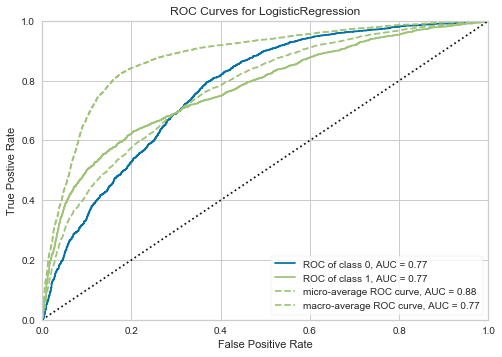

In [12]:
plot_model(tuned_lr, plot = 'auc')

#### 6.2 Feature Importance 

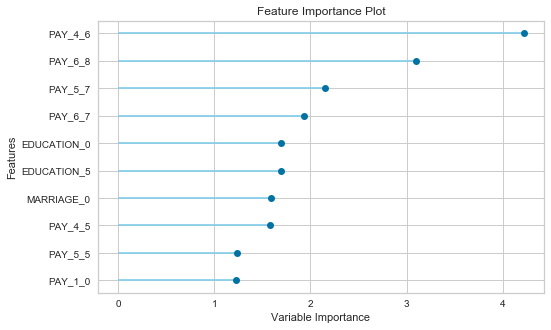

In [13]:
plot_model(tuned_lr, plot='feature')

#### 6.3 Confusion Matrix

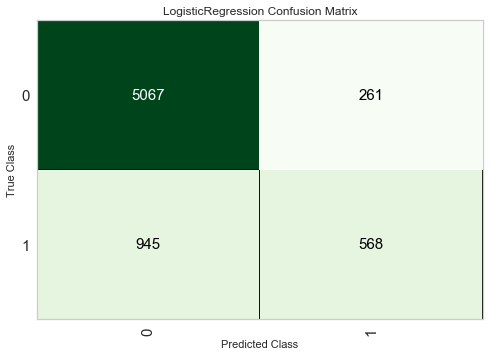

In [14]:
plot_model(tuned_lr, plot = 'confusion_matrix')

#### 6.4 Decision Boundary

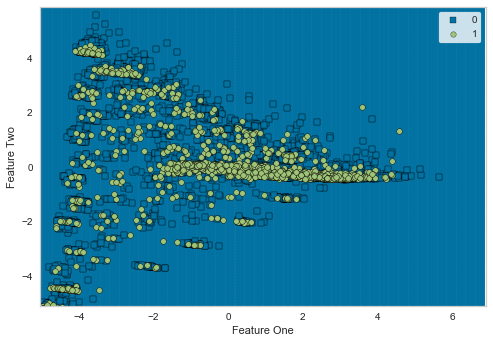

In [15]:
plot_model(tuned_lr, plot = 'boundary')

### 7. Predict on test set

Use best model to predict on test set

In [16]:
predict_model(tuned_lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.8237,0.7709,0.3754,0.6852,0.4851,0.3895


,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,...,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,default,Label,Score
0,0.246648,-0.594489,0.268444,0.287844,-0.340373,-0.242696,-0.178938,-0.309563,-0.185413,-0.231093,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.6103
1,-0.908966,1.037411,-0.677761,-0.654069,-0.322310,-0.242696,-0.289258,-0.309563,-0.308349,-0.294573,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.3073
2,-1.217130,-0.703282,-0.654430,-0.521510,-0.250059,-0.173306,-0.234098,-0.244524,-0.244486,-0.210307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.8452
3,-0.523761,-0.159315,0.442327,0.016858,-0.201891,-0.161060,-0.041038,-0.094935,-0.308349,-0.097953,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.7856
4,0.785934,3.213277,-0.691687,-0.547170,-0.340373,-0.139794,-0.003309,0.238195,0.098714,-0.294573,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.1744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6836,-0.908966,0.602238,-0.658694,-0.613717,0.261724,-0.242696,-0.232112,-0.304425,-0.293533,-0.288393,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.1784
6837,-0.677843,1.037411,-0.216108,0.008120,-0.244821,-0.166081,-0.191735,-0.225533,-0.250873,-0.217891,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.1342
6838,0.554812,0.493444,2.190272,3.093156,0.171409,-0.038606,-0.289258,0.731060,0.202556,-0.294573,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.9159
6839,0.323689,1.581378,-0.688543,-0.651553,-0.316892,-0.226777,-0.267746,-0.284198,-0.298770,-0.250755,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.1874


### 8. Deploy Model

In [17]:
final_lr = finalize_model(tuned_lr)
final_lr

LogisticRegression(C=3.84, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=2345, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### 9. Save Model

In [18]:
save_model(final_lr,'Final_Logisic_Regression_Model_20200422')

Transformation Pipeline and Model Succesfully Saved


### 10. Load Model

In [19]:
saved_final_lr = load_model('Final_Logisic_Regression_Model_20200422')

Transformation Pipeline and Model Sucessfully Loaded


#### 10.1 Predict on unseen data

In [21]:
pred = predict_model(saved_final_lr, data=data_unseen)
pred.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label,Score
0,50000,2,2,1,48,0,0,0,0,0,...,8011.0,2028.0,2453.0,2329.0,431.0,300.0,500.0,0,0,0.1478
1,200000,2,1,1,40,2,2,2,2,2,...,89112.0,4200.0,4100.0,3000.0,3400.0,3500.0,0.0,1,1,0.8249
2,50000,2,3,1,44,1,2,3,2,4,...,15798.0,2100.0,1000.0,2300.0,0.0,0.0,0.0,1,1,0.7096
3,60000,2,2,1,31,2,2,-1,0,0,...,30384.0,1132.0,60994.0,1436.0,1047.0,1056.0,1053.0,1,0,0.4839
4,120000,2,3,2,32,-1,0,0,0,0,...,81354.0,2429.0,3120.0,3300.0,10000.0,3200.0,3200.0,0,0,0.2041
5,140000,2,2,2,32,2,0,0,2,2,...,137176.0,6000.0,20000.0,2000.0,3500.0,15000.0,6000.0,0,1,0.7656
6,300000,2,1,1,33,-1,-1,-1,-1,-1,...,2956.0,4008.0,1438.0,5328.0,6814.0,114.0,1740.0,0,0,0.1114
7,310000,2,3,2,30,1,-1,0,0,0,...,50009.0,120000.0,18008.0,20000.0,12000.0,5000.0,3000.0,0,0,0.0592
8,330000,2,1,2,31,-1,0,0,0,0,...,8995.0,1091.0,2000.0,1222.0,2400.0,3000.0,2000.0,0,0,0.1433
9,210000,2,1,1,35,0,0,0,0,0,...,60227.0,2500.0,2700.0,2500.0,5100.0,0.0,3000.0,0,0,0.1576
